In [1]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from IPython.display import Audio # We only need the Audio 'Class' from this package

# Class 6 - DST Lab
## New York University

***

### Final Project Introduction

## Continuous-time Fourier transform

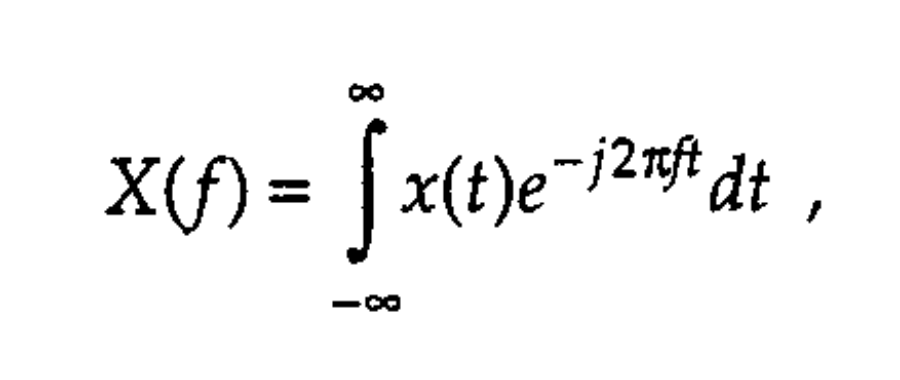

## DFT (Discrete Fourier Transform)
#### DFT is simply a discetization of the Continous-time Fourier Transform

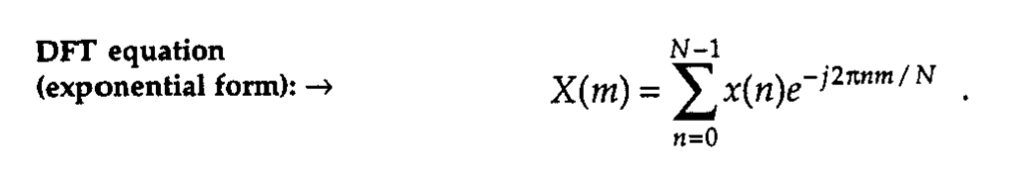

- Summation rather than integral (we are summing discrete frequency terms rather than infinitesimally small slices)
- We set bounds on the summation rather than summing from -infinity to +infinity
- Evaluate using discrete time 'n' instead of continuous time 't'

### Equation can be simplified using Eulers Formula

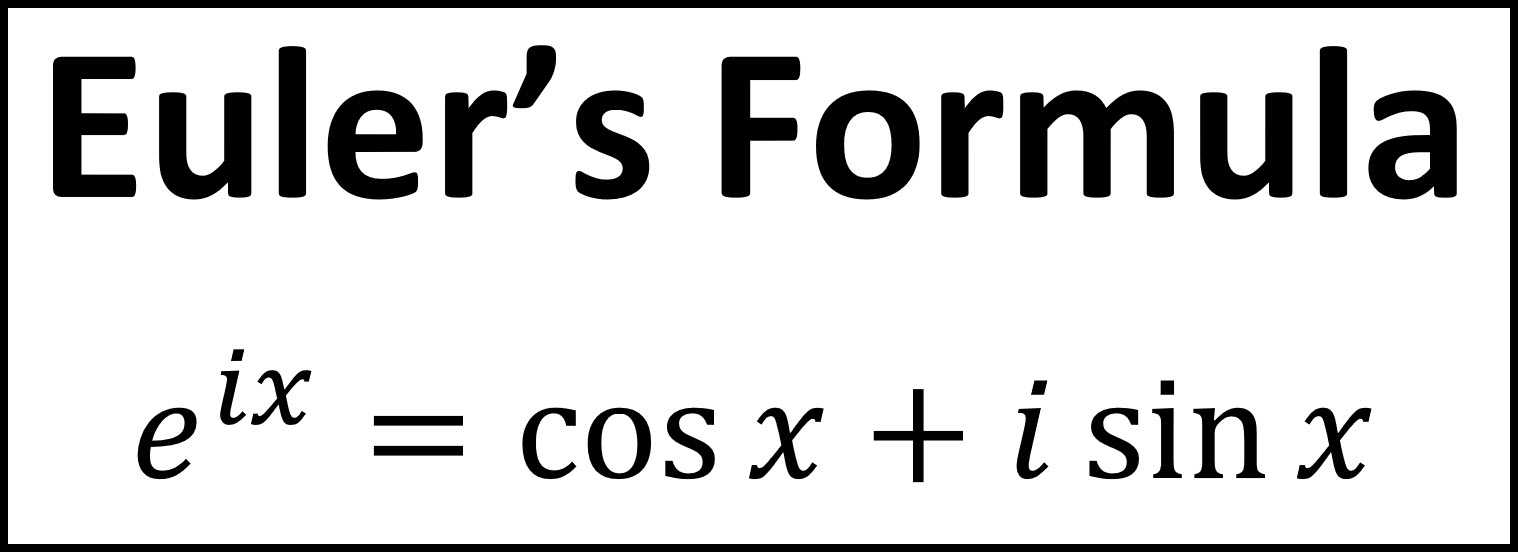
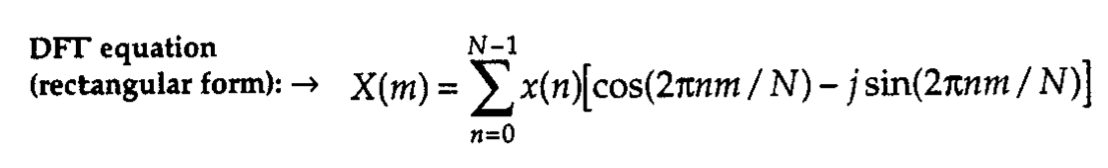



## Intuitively, how does the Fourier transform equation work?

- NOTE: this equation only evaluates at one single frequency, typically you will evaluate it for many different m values corresponding to different frequencies covering the range of human hearing

- x(t) is the signal that we are analyzing

- the exponential term is a sine wave (we'll ignore the fact that there is both a sin and cos term for now, that just allows us to capture phase information)
    - this sine wave is at a specific frequency for each value of m that we evaluate this equation at
    
    
- We multiply the instantaneous value of these equations together at every point in time and add the result of this multiplication together

- What happens when you multiply together two sine waves with the same frequency?

- What happens when you multiply together two sine waves with different frequencies?

- When we evaluate the DFT equation for one value of M we are essentially asking: How present is the frequncy M in the signal x(t)?

## Frequency Resolution

   - N determines
        - number of time-domain input samples (length of audio being analyzed)
        - number of frequencies being analyzed
        - resolution of frequency-domain results, higher N means analyzed frequencies are closer together
            - frequency of each sine is 2\*pi\*m/N
        - processing time needed to calculate N-point DFT
            - this higher N is, the more samples we need to sum</br></br>
        
           
   - To calculate the actual frequencies being analyzed: f0 = fs/N
       - lowest freq analyzed: f0 = sr / N
       - the rest of the frequencies are equally spaced at intervals of f0 Hz 
       - frequency at X(m) = f0*m


### Symmetry of DFT

    - Always remember Nyquist frequency!
    - Example below: 8-point DFT at fs = 8Khz
    
  

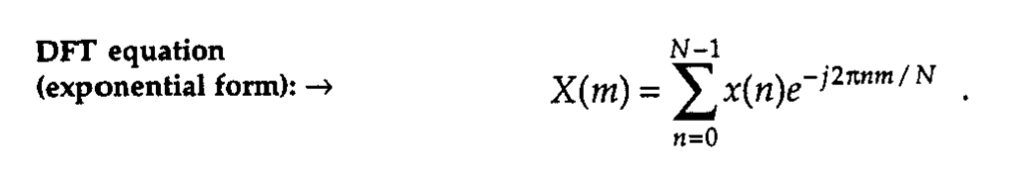

## DFT Calculation

In [2]:
def DFT(x):
    N = len(x)
    n = np.arange(N)
    m = n.reshape((N, 1))
    exponential = np.exp(-2j * np.pi * m * n / N)
    X = np.dot(exponential, x)
    
    return X

In [3]:
def sine_gen(amplitude, frequency, phase, duration, sample_rate):
    t_v = np.arange(0, duration, 1/sample_rate) 
    output = amplitude * np.sin(2 * np.pi * frequency * t_v + phase)
    return output

In [4]:
sr = 100

sine_1 = sine_gen(3, 1, 0, 2, sr)
sine_2 = sine_gen(1, 4, 0, 2, sr)
sine_3 = sine_gen(2, 15.5, 0, 2, sr)

signal = sine_1 + sine_2 + sine_3

my_DFT = DFT(signal)

In [5]:
# vec = np.arange(5)
# vec_r = vec.reshape((5, 2))

# print(vec)
# print(vec_r)

### Plotting the DFT

(0.0, 50.0)

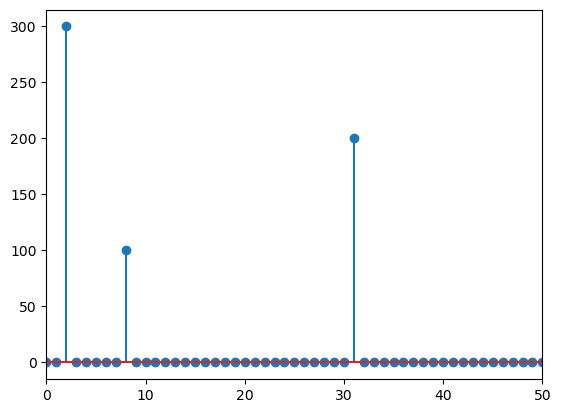

In [6]:
plt.stem(abs(my_DFT))
plt.xlim(0, sr//2) 

## What happens when the frequencies don't line up directly with analysis bins

How can we increase the resolution of our DFT?
- increase N (how do we increase N)
- Analyze a longer region (more than one second)
- Use a higher sample rate

After changing one of these, does the X-axis still correspond to our frequency bins?
- No, I chose very specific values for sr and length so that it does but we really should manually calculate it!

Text(0.5, 0, 'Frequency (Hz)')

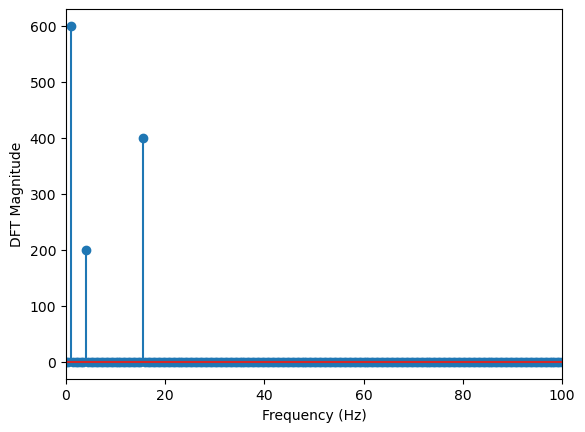

In [7]:
sr = 200

sine_1 = sine_gen(3, 1, 0, 2, sr)
sine_2 = sine_gen(1, 4, 0, 2, sr)
sine_3 = sine_gen(2, 15.5, 0, 2, sr)

signal = sine_1 + sine_2 + sine_3

my_DFT = DFT(signal)

N = len(signal)
frequency_bins = np.arange(0, sr, sr/N)
# print(frequency_bins)

plt.stem(frequency_bins, abs(my_DFT))
plt.xlim(0, sr//2) 
plt.ylabel('DFT Magnitude')
plt.xlabel('Frequency (Hz)')

## Calculating the frequencies being analyzed



## How long does it take our DFT to run?

In [8]:
sr = 200

sine_test = sine_gen(3, 1, 0, 1, sr)

%timeit -n 2 -r 1 DFT(sine_test)

1.66 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 2 loops each)


In [9]:
sr = 400

sine_test = sine_gen(3, 1, 0, 1, sr)

%timeit -n 2 -r 1 DFT(sine_test)

5.74 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 2 loops each)


In [10]:
sr = 800

sine_test = sine_gen(3, 1, 0, 1, sr)

%timeit -n 2 -r 1 DFT(sine_test)

24.4 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 2 loops each)


In [11]:
sr = 1600

sine_test = sine_gen(3, 1, 0, 1, sr)

%timeit -n 2 -r 1 DFT(sine_test)

89.4 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 2 loops each)


# FFT (Fast Fourier Transform)


    - algorithm to efficiently calculate DFT by splitting an N-point DFT into multiple shorter DFTs
    - result is identical to DFT
    - most efficient when N is a power of two:
        - 256, 512, 1024, 4096 are common FFT lengths
        

(0.0, 20.0)

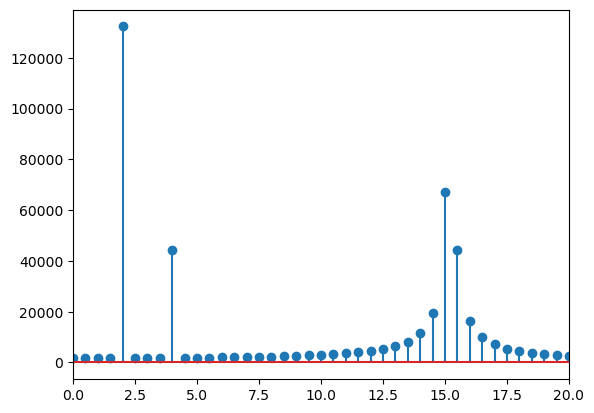

In [20]:
sr = 44100

sine_1 = sine_gen(3, 2, 0, 2, sr)
sine_2 = sine_gen(1, 4, 0, 2, sr)
sine_3 = sine_gen(2, 15.2, 0, 2, sr)

signal = sine_1 + sine_2 + sine_3

# sig, rate = sf.read('sig.wav')

fft = np.fft.fft(signal)

mag_fft = np.abs(fft)

#calculate the frequencies of the bins
f_v = np.arange(0, sr, sr/len(fft))

plt.stem(f_v, mag_fft)
plt.xlim(0, 20)

# %timeit -n 2 -r 1 np.fft.fft(signal)

In [45]:
table_size = 4096
sr = 44100

t_v = np.arange(0, 2 * np.pi, (2 * np.pi / table_size))

sine_table = np.sin(t_v)

# plt.plot(sine_table)

# 
t_v_1 = np.arange(0, 2 * np.pi, (2 * np.pi / table_size))
sine_1 = np.sin(t_v)

t_v_2 = np.arange(0, 4 * np.pi, np.pi / table_size * 4 )
sine_2 = np.sin(t_v_2)
# sine_2 = np.append(sine_2, sine_2)

complex_sine = sine_1 + sine_2


In [46]:
Audio(sine_table, rate = sr)

In [51]:
def wavetable_synth(frequency, duration, sr, wavetable):
    out = np.zeros(duration * sr)
    table_index = 0
    table_size = np.size(wavetable)
    
    table_increment = table_size / sr * frequency
    
    for i in range(0, duration * sr):
        out[i] = wavetable[int(table_index)]
        table_index = table_index + table_increment
        if(table_index >= table_size):
            table_index -= table_size
            
    return out

In [53]:
sr = 44100
my_sine = wavetable_synth(440, 2, sr, complex_sine)

Audio(my_sine, rate = sr)